## Example of multi-variable Linear Regression

In this notebook we use the following [dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality) from the [UCI machine learning repository](https://archive.ics.uci.edu/ml/index.php) which contains a lot of usefull dataset for training purposes.

Here, we will try to predict the quality of the wine using the available features.

### Data Set Information

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


### Attribute Information

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

**Output variable**

12 - quality (score between 0 and 10)


In [110]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import to_categorical
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [111]:
def show_correlation_graph(data, title=None, cmap=None, linewidths=0, figsize=(9, 6), annot=True):
    """Utility to plot the correlation graph for the passed in data."""
    if cmap is None:
        cmap = sns.diverging_palette(10, 120, as_cmap=True)
    data = data.dropna()    
    corr = data.corr()
    for column_name in corr.columns:
        corr[column_name] = corr[column_name].abs()
    _, ax = plt.subplots(figsize=figsize)
    if title:
        ax.set_title(title)

    sns.heatmap(corr, annot=annot, fmt="2.2f", linewidths=linewidths, ax=ax, cmap=cmap)    

In [112]:
df = pd.read_csv("./data/wines.csv")

## Show some statistics about the dataset

In [113]:
_ = df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 6497 non-null   object 
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


color  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0   red            7.4              0.70         0.00             1.9   
1   red            7.8              0.88         0.00             2.6   
2   red            7.8              0.76         0.04             2.3   
3   red           11.2              0.28         0.56             1.9   
4   red            7.4              0.70         0.00             1.9   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        5  
3       0.58      9.8        6  
4       0.56      9.4        5

In [114]:
df.describe().transpose()

count        mean        std      min       25%  \
fixed_acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile_acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric_acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual_sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free_sulfur_dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total_sulfur_dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%        75%        max  
fixed_acidity           7.00000    7.70000   15.90000  
volatile_acidity        0.29000    0.40000    1.58000  
citric_acid             0.31000    0.39000    1.66000  
residual_sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free_sulfur_dioxide    29.00000   41.00000  289.00000  
total_sulfur_dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000

## Check for feature correlations

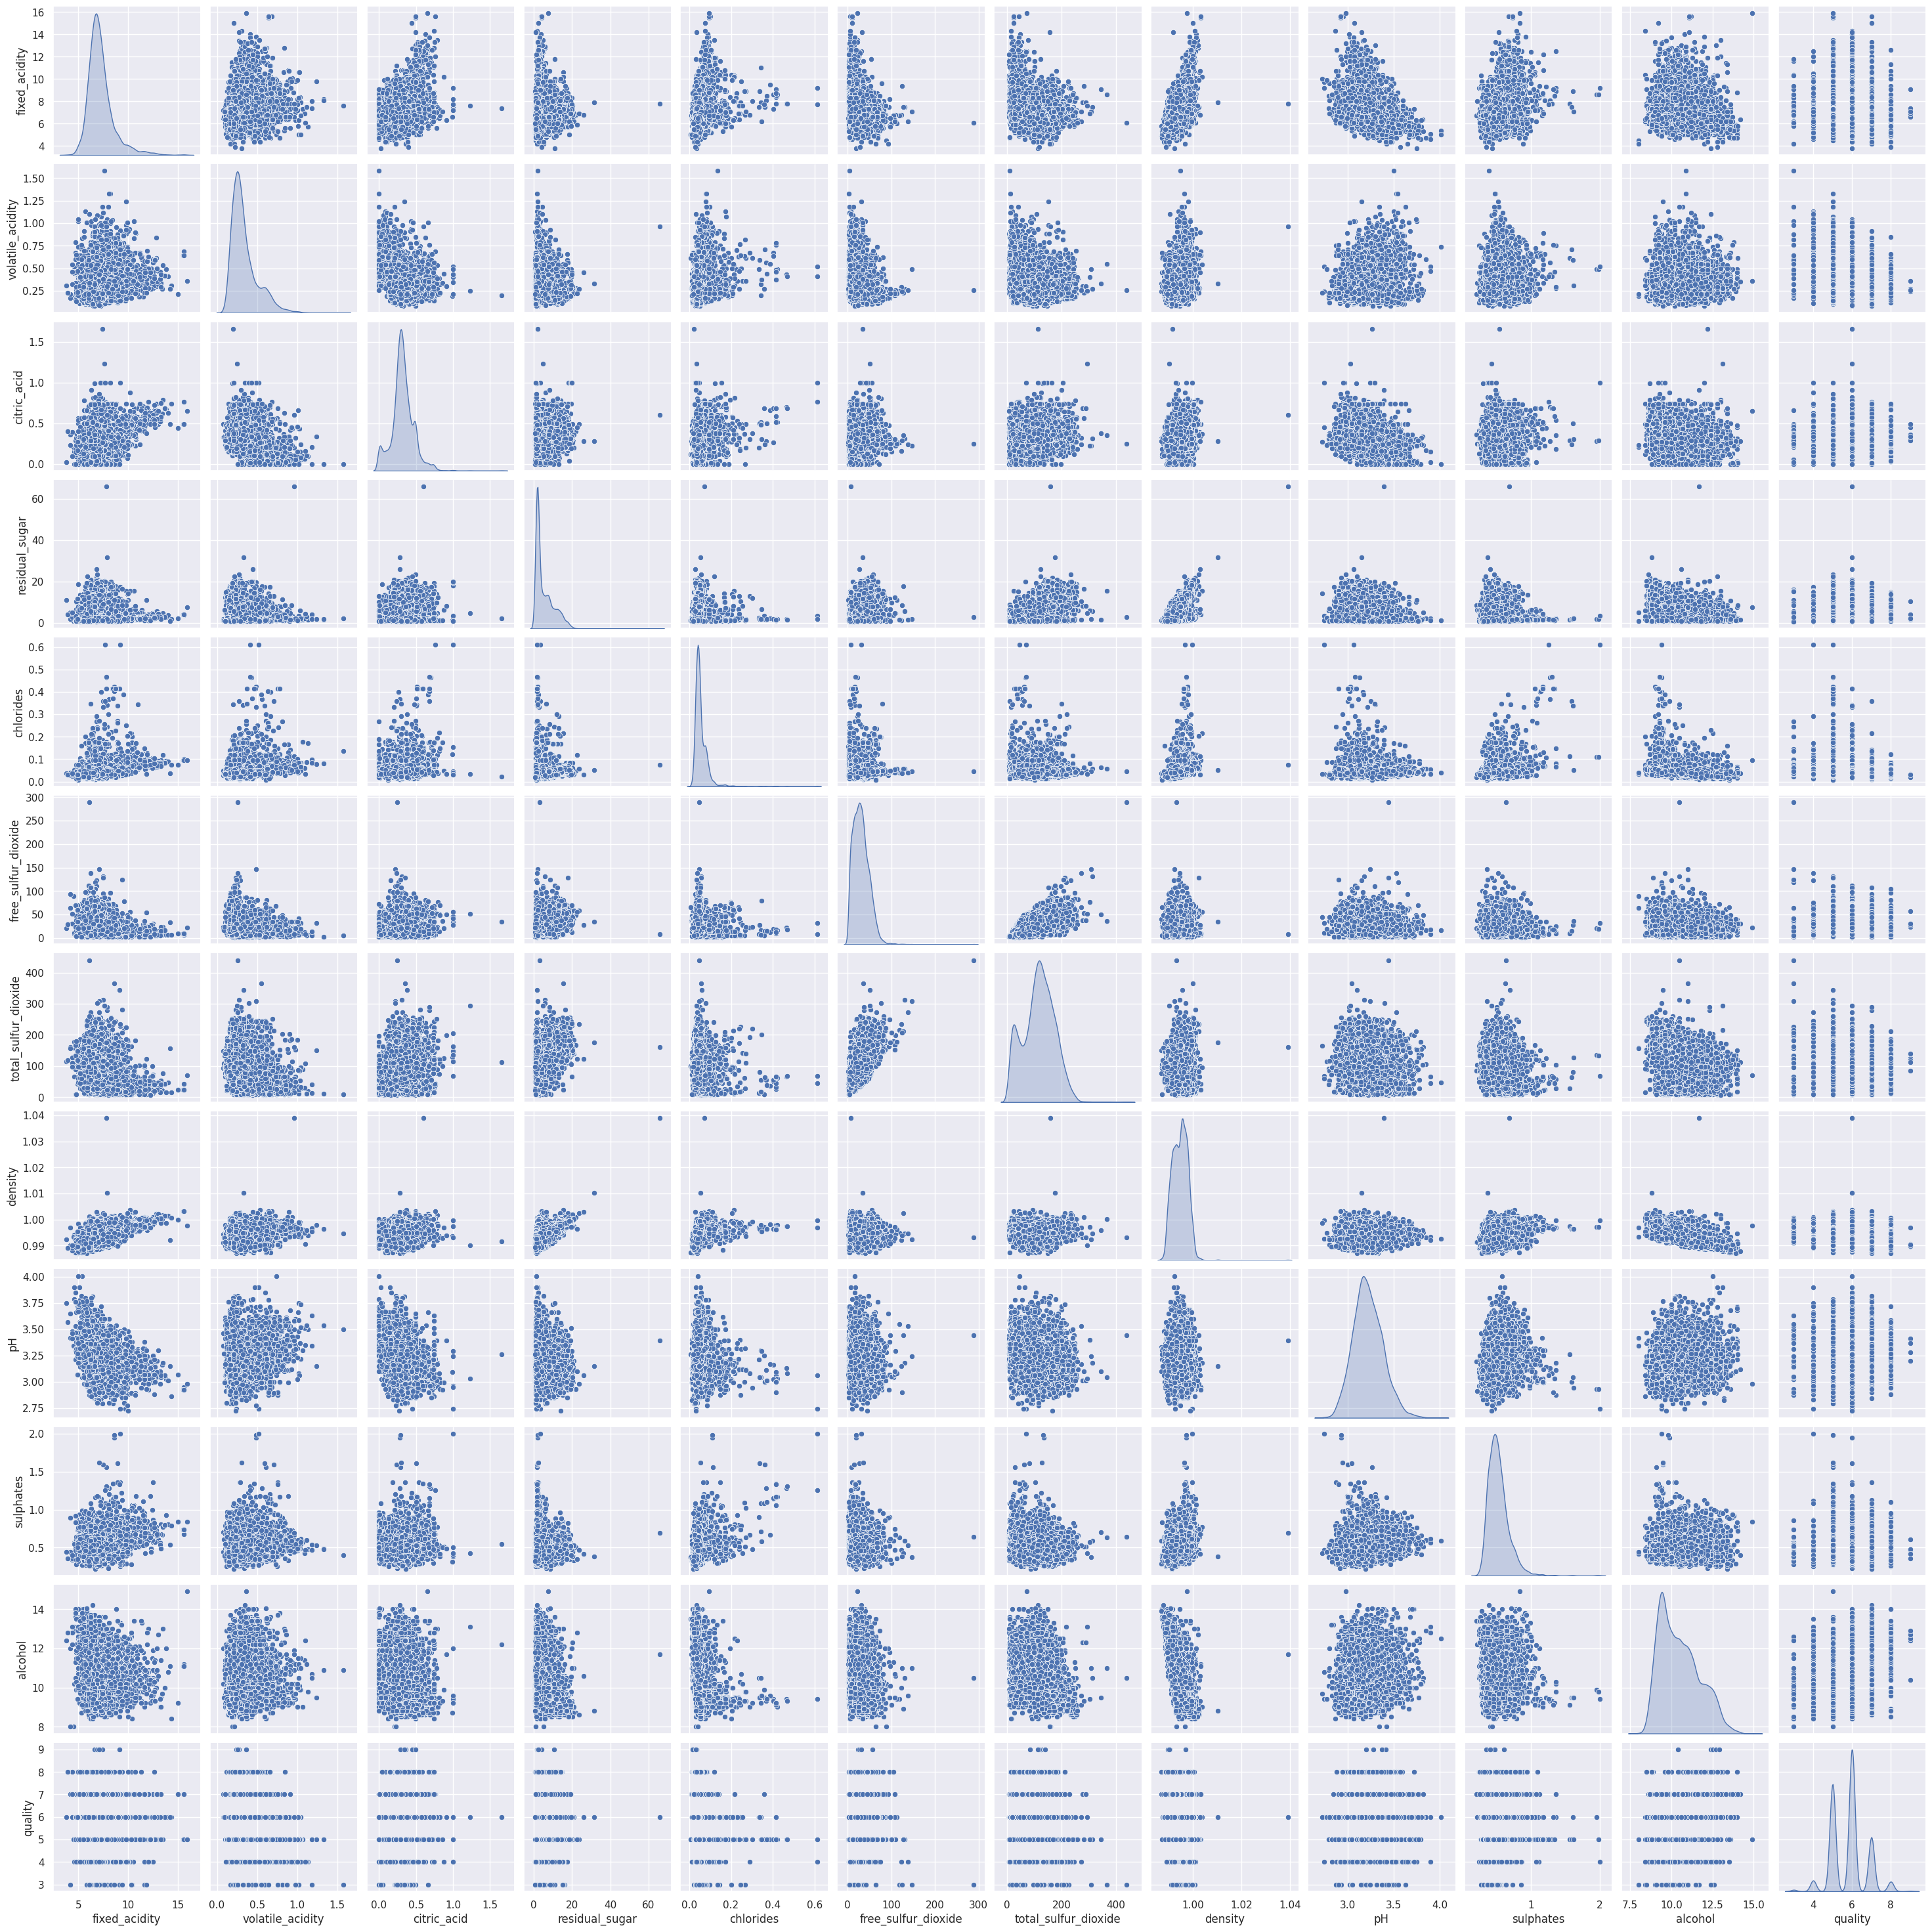

In [115]:
_ = sns.pairplot(df, diag_kind='kde')

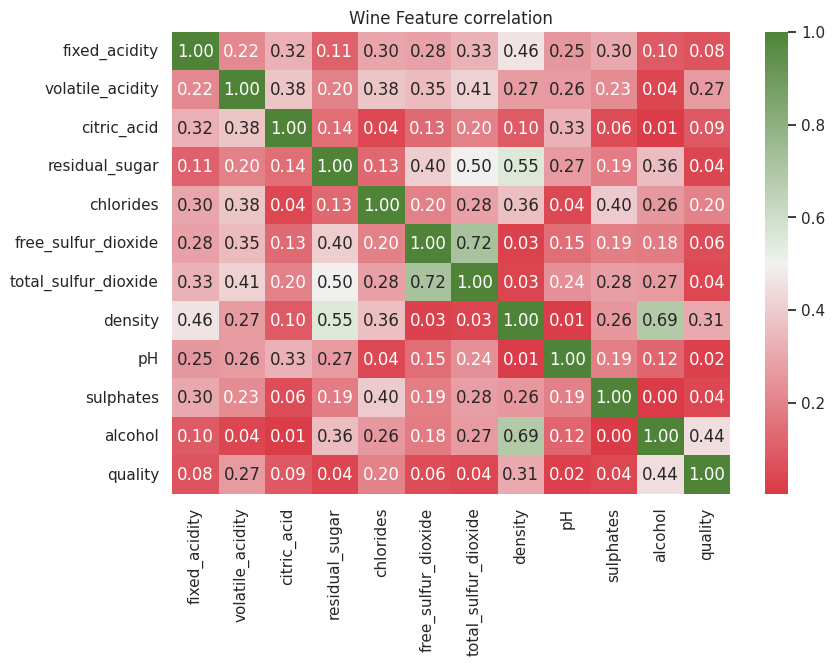

In [116]:
show_correlation_graph(df, title="Wine Feature correlation", cmap=None, linewidths=0, figsize=(9, 6), annot=True)

In [117]:
model = LinearRegression().fit( X_train, y_train)

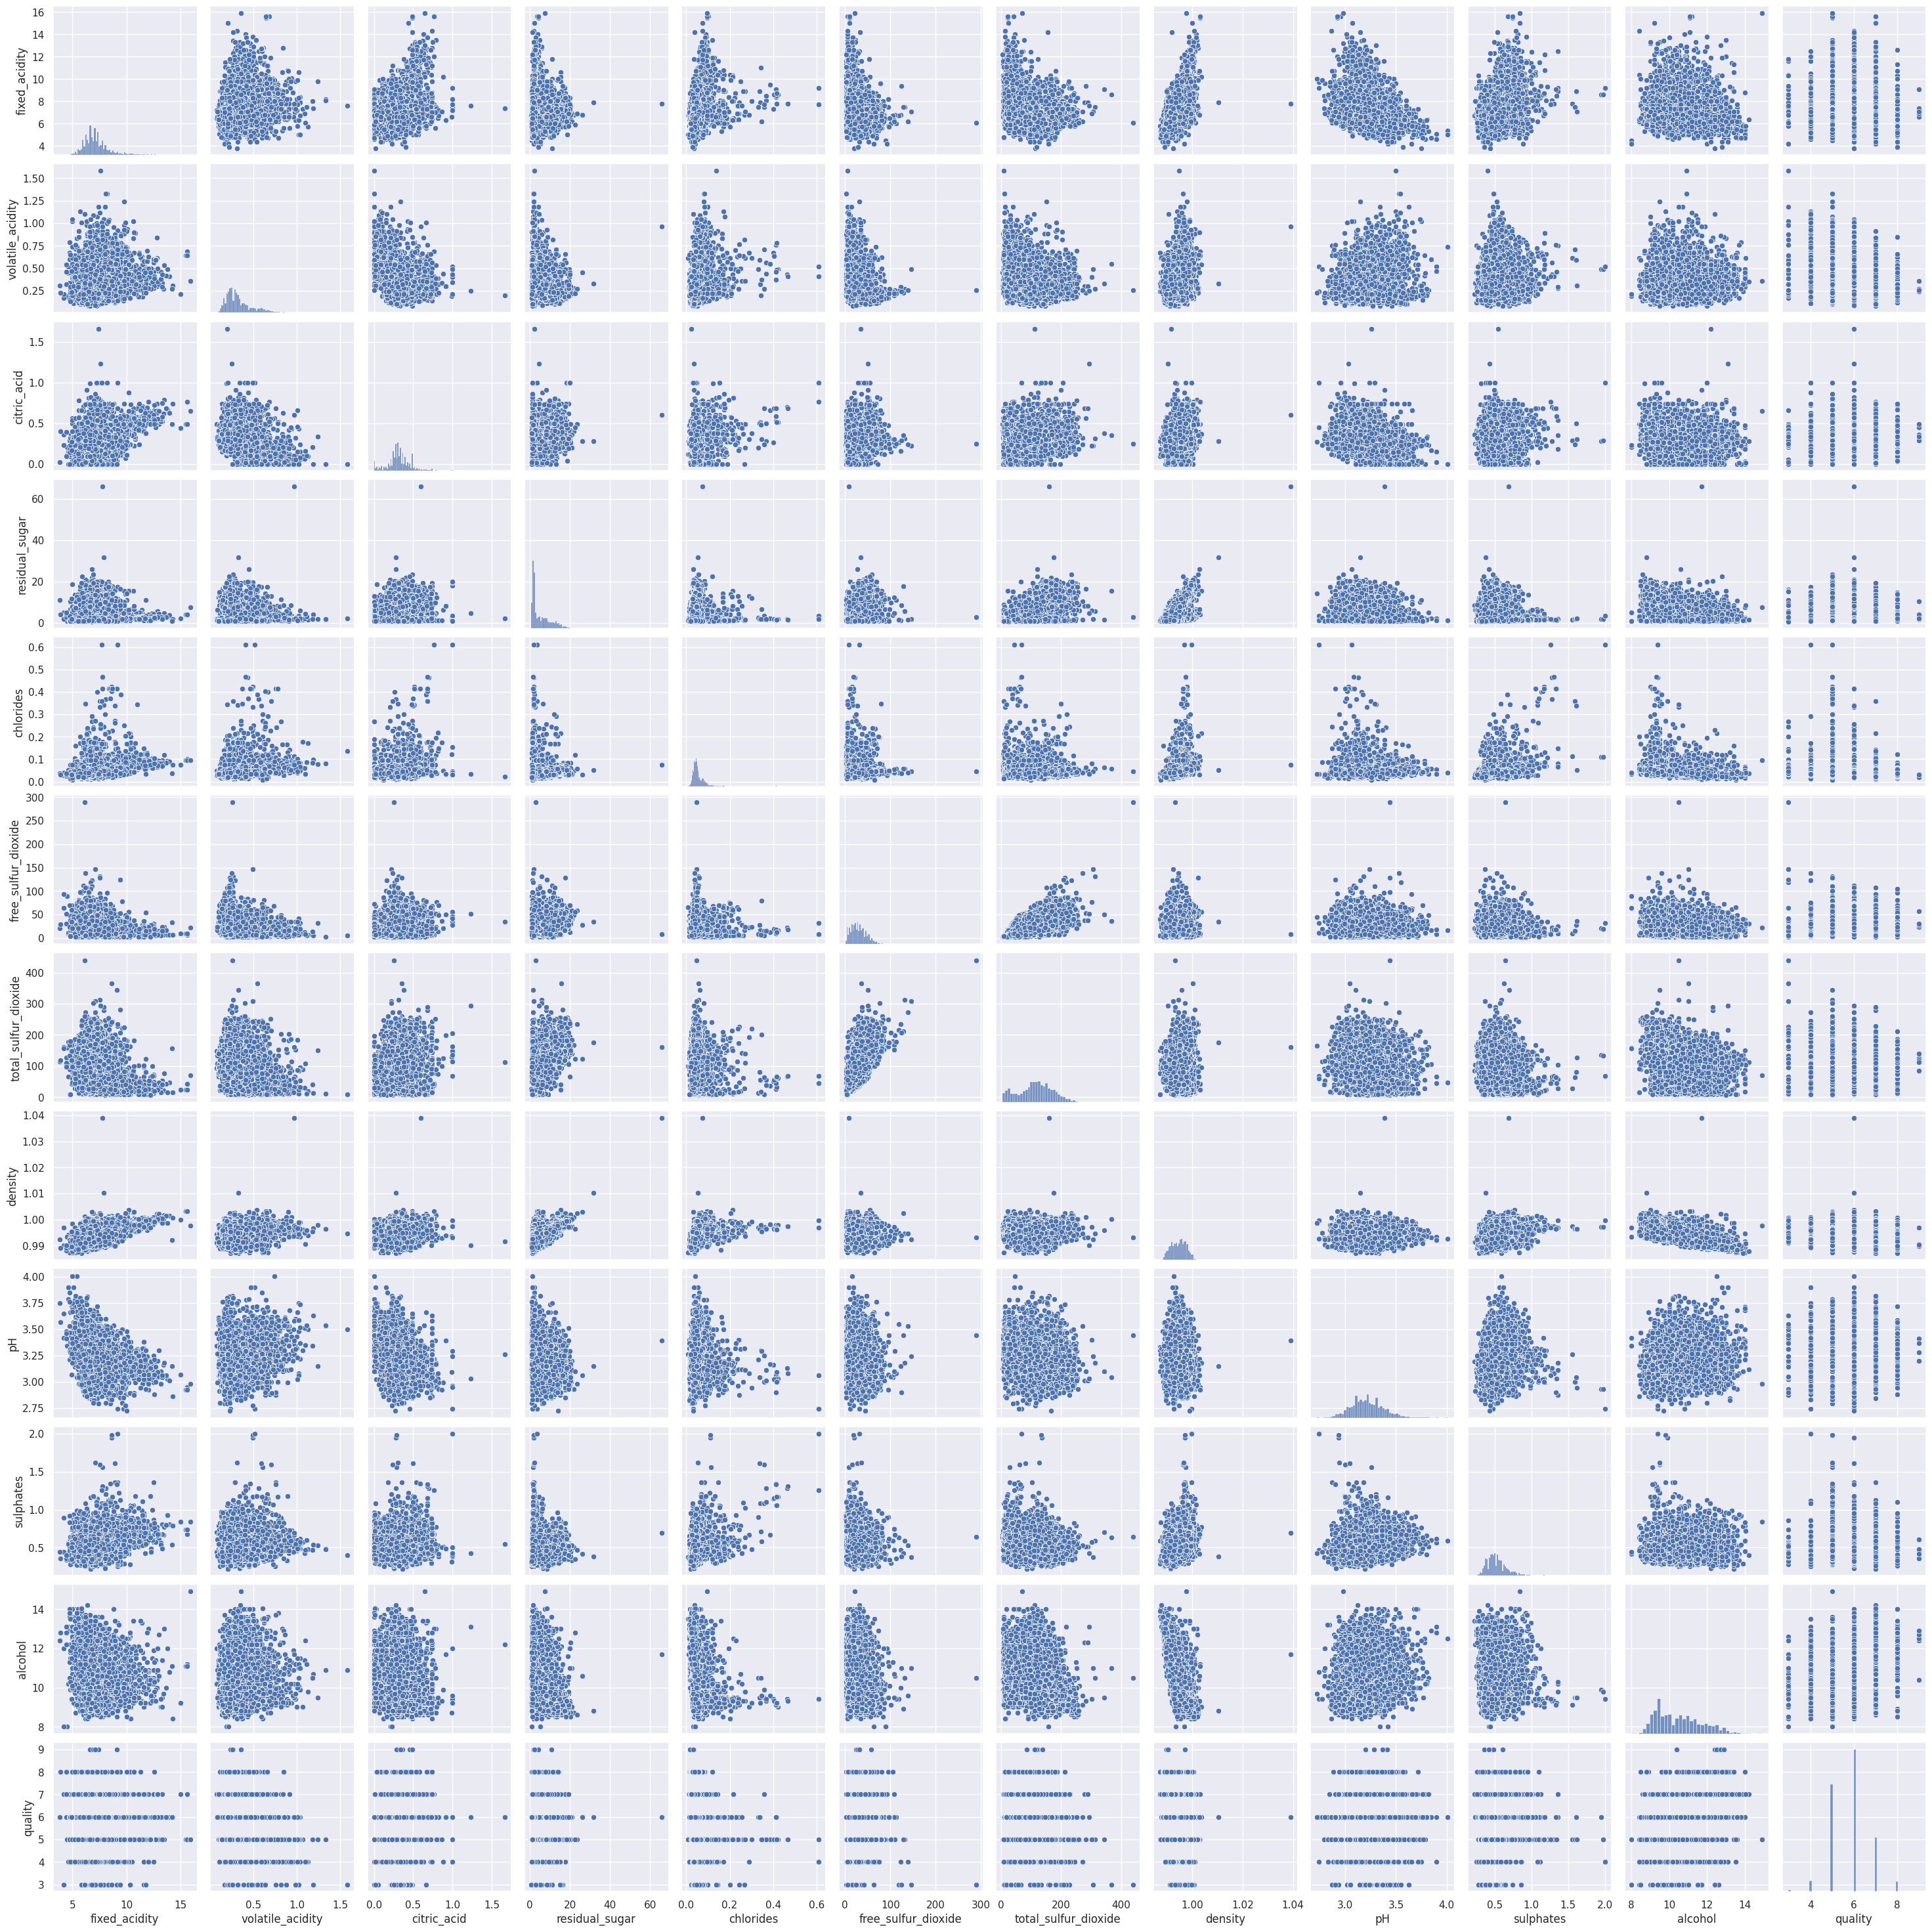

In [118]:
# pairplot with hue sex
sns.pairplot(df)
plt.show()

In [119]:
X = df.drop('color',axis= 1)
y = pd.DataFrame(X.pop("quality"))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


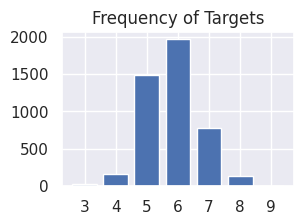

In [174]:
counts = []
for i in  y_train["quality"].unique():
    counts.append ( (i,   len(y_train[(y_train["quality"] == i)])) ) 
counts.sort(key=lambda x: x[0])
labels = [p[0] for p in counts]
values = [p[1] for p in counts]
plt.bar(labels, values)
plt.title("Frequency of Targets")
_ = plt.xticks(labels)

### Features distribution

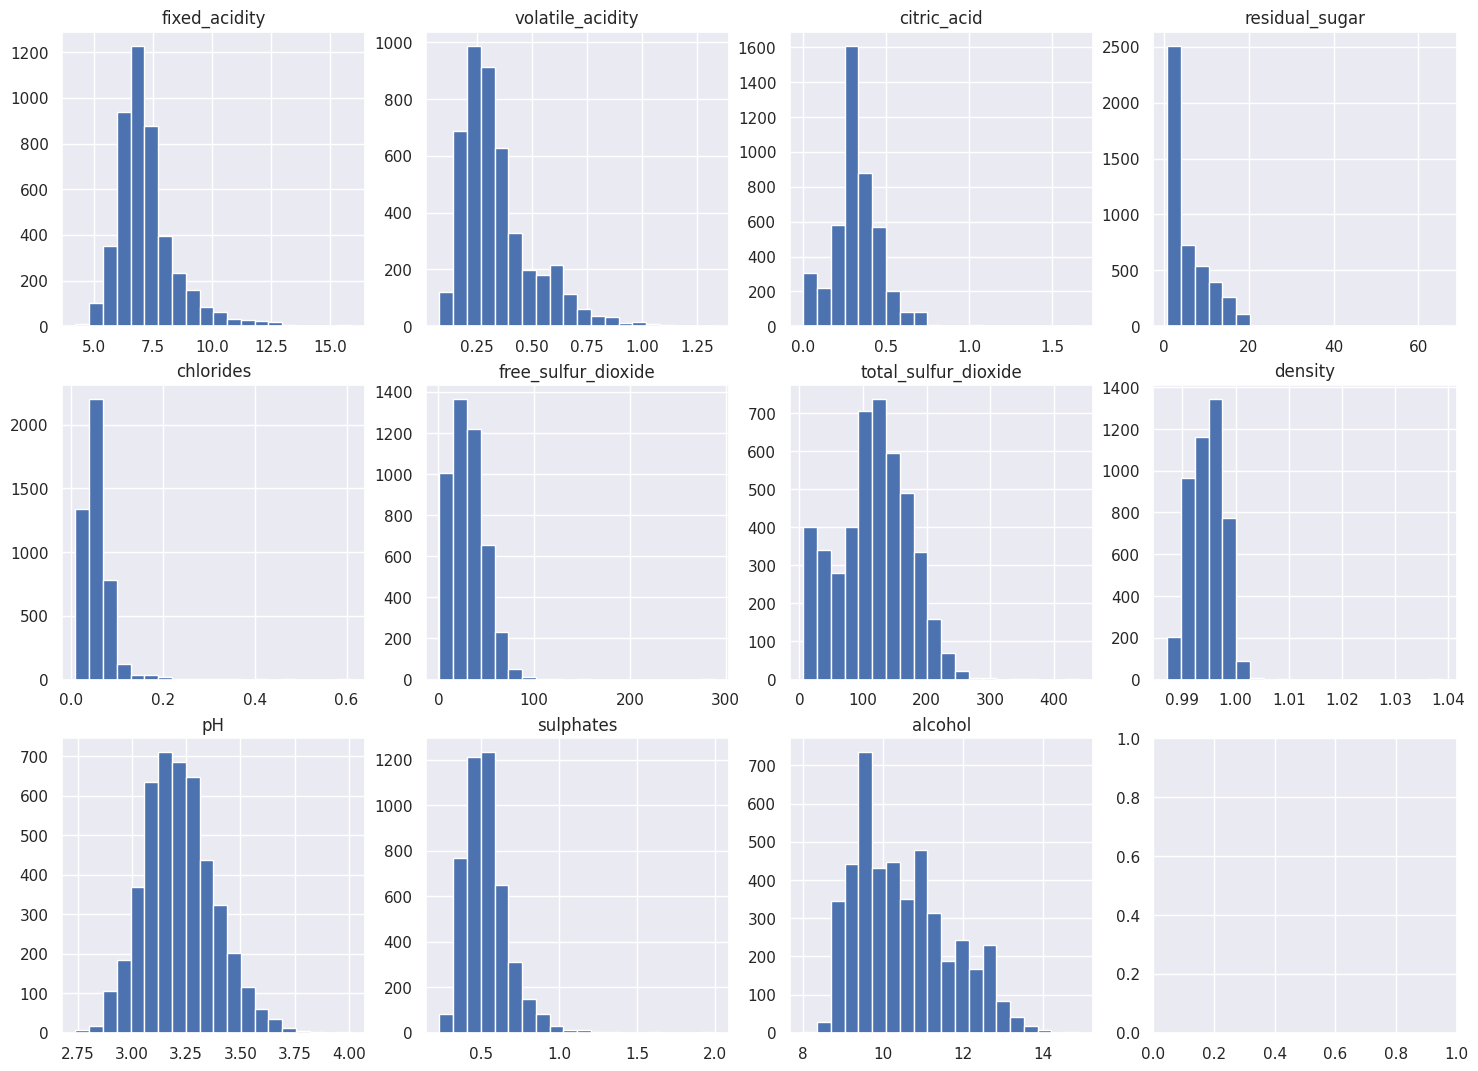

In [241]:
fig, x = plt.subplots(nrows=3, ncols=4, figsize = (18,13))
reshaped2 = np.reshape(x, (12, ))
for index, cn in enumerate(X_train.columns):
    reshaped2[index].hist(X_train[cn], bins=20)
    reshaped2[index].set_title(cn)
_= plt.show()



In [240]:
predictions = model.predict(X_test)
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
dataset = pd.DataFrame({'Predicted': predictions.reshape((len(predictions),)), 'Expected': y_test["quality"]  })
dataset["MSE"] = (dataset["Expected"] - dataset["Predicted"]) ** 2
dataset

mean_squared_error :  0.5336721195885842
mean_absolute_error :  0.5653209053122744


Predicted  Expected       MSE
868    6.024318         6  0.000591
5097   5.710654         6  0.083721
5450   6.943859         7  0.003152
5850   5.758772         6  0.058191
2192   5.306633         5  0.094024
...         ...       ...       ...
6040   6.403890         6  0.163128
2890   5.736508         6  0.069428
914    6.189523         6  0.035919
1403   6.073486         8  3.711456
4077   5.512943         6  0.237225

[1950 rows x 3 columns]